In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import helpers
from multiprocessing import Pool
from skimage import exposure
from datetime import datetime
import glob
from skimage.measure import label, regionprops_table, regionprops
import pandas as pd
from scipy import ndimage
from f2010label import *

In [18]:
filename = 'benoitdata/F20_10_b/6um_jamtveit_att_pag-1.99_3.12_00015.tif'

img = cv2.imread(filename,0)
i_ves = apply_otsu_dilate_erode(img)
i_ves = remove_convex_area_erode(i_ves)
i_ves = convert_to_binary(i_ves)

# frac_img = helpers.fix_brightness(img)
i_frac = label_fractures(img)
# i_frac = label_fractures(frac_img)
i_frac = median_max(i_frac)
i_frac = remove_convex_area_eccentricity(i_frac, convex_area=60, eccentricity=0.2)

In [3]:
# imarr_maskradius = helpers.remove_data_based_on_radius(img, mask_value=np.nan)
# zim = helpers.zscore(imarr_maskradius)

# zim_remove = zim.copy()
# zim_remove[zim_remove > -2] = 0

# x1, y1 = zim_remove.nonzero()

# zeros = np.zeros_like(zim_remove)

# zeros[x1, y1] = 1

# # zeros = cv2.dilate(zeros, np.ones((2, 2), np.uint8))

# # footprint condition says value should be greater
# # in all directions
# footprint1 = np.array(
#     [[1, 1, 1]
#     ,[1, 0, 1]
#     ,[1, 1, 1]]
# )

# footprint2 = np.array(
#     [[1, 1, 1, 1, 1]
#     ,[1, 1, 1, 1, 1]
#     ,[1, 1, 0, 1, 1]
#     ,[1, 1, 1, 1, 1]
#     ,[1, 1, 1, 1, 1]]
# )

# # creates a window based on the given footprint
# # to compare neighbors and replace values on 
# # nearest maximum value
# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html
# zeros = ndimage.median_filter(zeros, footprint=footprint1, mode='constant')
# zeros = ndimage.maximum_filter(zeros, footprint=footprint2, mode='constant')

# # zeros = cv2.erode(zeros, np.ones((4, 4), np.uint8))
# # zeros = cv2.dilate(zeros, np.ones((4, 4), np.uint8))

# labeled_fracs = label(zeros)
# df = pd.DataFrame(regionprops_table(labeled_fracs, properties=['bbox', 'bbox_area', 'convex_area', 'eccentricity'
# #                                             , 'equivalent_diameter' # this is the same as convex area more or less
#                                             , 'extent', 'label', 'major_axis_length', 'minor_axis_length']))
# i2 = np.where(np.isin(labeled_fracs, df[(df.convex_area > 60) & (df.eccentricity > 0.8)].label.values), zeros, np.nan)

# i2

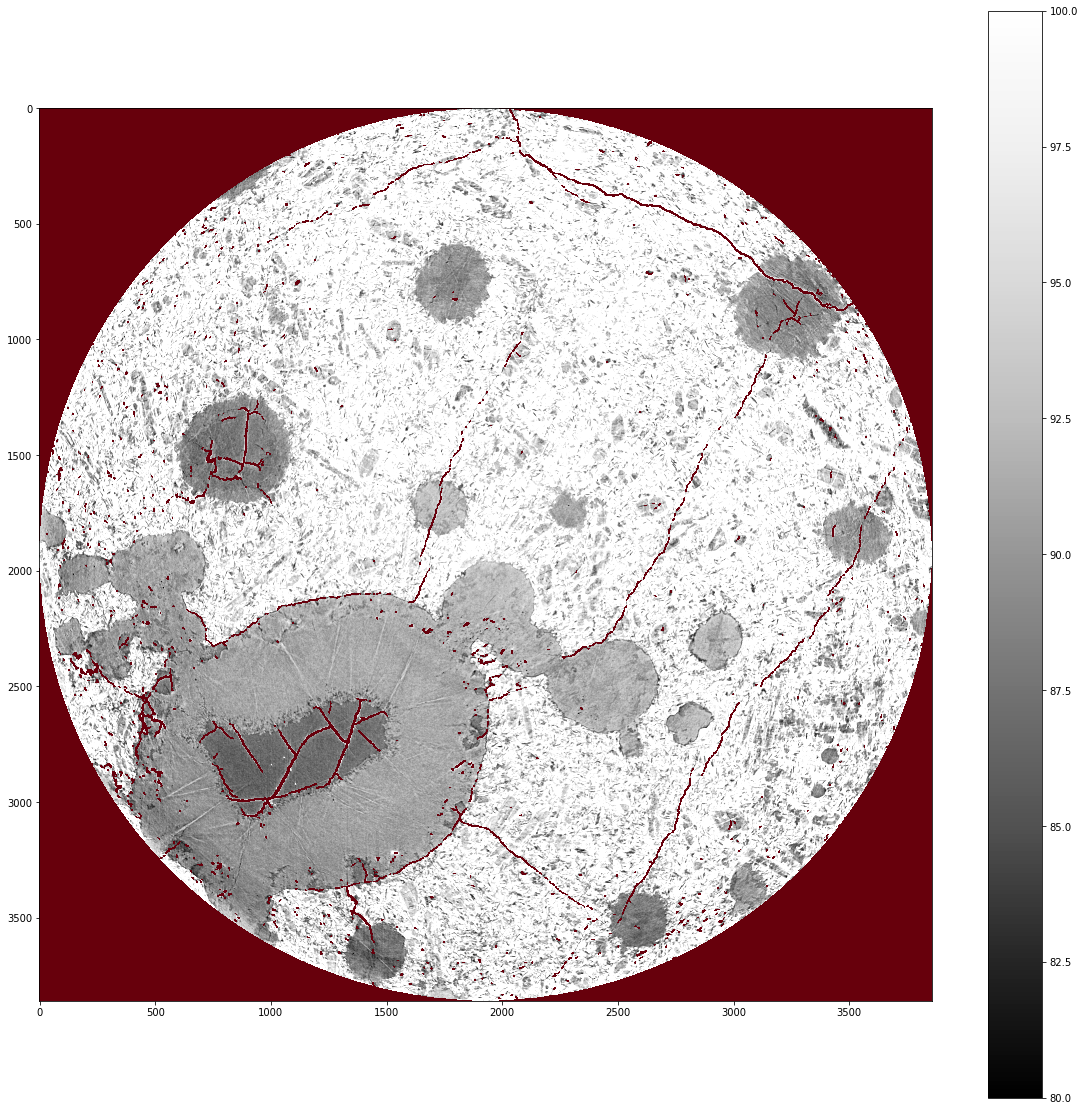

In [22]:
fig, ax = helpers.plot_image(img, vmin=80, vmax=100, cmap='Greys_r')
# fig, ax = helpers.plot_image(i_frac, cmap='Greys_r', interpolation='none')
ax.imshow(i_frac, cmap='Reds_r', interpolation='none')
# ax.imshow(i2, cmap='plasma_r', interpolation='none')